### Desafio AceleraDev DataScience Semana 09

#### Descubra quem fez o ENEM 2016 apenas para treino


Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para treino.

Tópicos
Neste desafio você aprenderá:

- Python
- Pandas
- Sklearn
- Regression
- Classification

**Detalhes**

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `IN_TREINEIRO`.

### Setup do desafio

Iniciamos o desafio com os imports das libs necessárias

Importando os datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Algumas configurações para o matplotlib.
plt.style.use('ggplot')
#%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

In [2]:
df_train= pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

Verificando os datasets (dimensões, variáveis disponíveis).

* Dados de treino

In [4]:
df_train.shape

(13730, 167)

In [5]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


* Dados de teste

In [6]:
df_test.shape

(4570, 43)

In [7]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


O dataset de treino é muito maior que os dados do dataset de test, então um tratamento que podemos utilizar é remover as variáveis que existem no DataSet de Treino e não existem no dataset de teste.

In [8]:
features = list(df_test.columns)
features.append('IN_TREINEIRO')
df_train = df_train[features]

In [9]:
train_insc = df_train['NU_INSCRICAO']

df_train.drop('NU_INSCRICAO', 1, inplace = True)

In [10]:
test_insc = df_test['NU_INSCRICAO']

df_test.drop('NU_INSCRICAO', 1, inplace = True)

Agora vamos verificar no nosso dataset de treino quantos valores possuem a variável **IN_TREINEIRO**.

In [11]:
df_train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

**Verificação de valores nulos**

Vamos verificar em nossos datasets quantos valores nulos possuímos.

In [12]:
df_train.isnull().sum()

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_

In [13]:
df_test.isnull().sum()

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3144
TP_DEPENDENCIA_ADM_ESC    3144
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                1112
NU_NOTA_CH                1112
NU_NOTA_LC                1170
TP_LINGUA                    0
TP_STATUS_REDACAO         1170
NU_NOTA_COMP1             1170
NU_NOTA_COMP2             1170
NU_NOTA_COMP3             1170
NU_NOTA_COMP4             1170
NU_NOTA_

Temos muitas variáveis com valores nulos em nosso dataset, antes de tratarmos esses dados vamos nos certificar quais possuem mais correlação com as variável desejada. 

**Tratando valores nulos**

oderíamos tratar os valores nulos de diversas formas: retirar do dataset, zerar, colocar um valor negativo. Nesta análise considerei os valores nulos como uma informação, por isso os mantive e decidi que todo valor nulo na minha análise seria substituído por 0.

In [14]:
df_train.fillna(0,inplace=True)
df_test.fillna(0,inplace=True)

**Verificando a correlação**

Vamos analisar quais variáveis possuem maior correlação com a variável desejada. 

In [15]:
corr = df_train.corr()

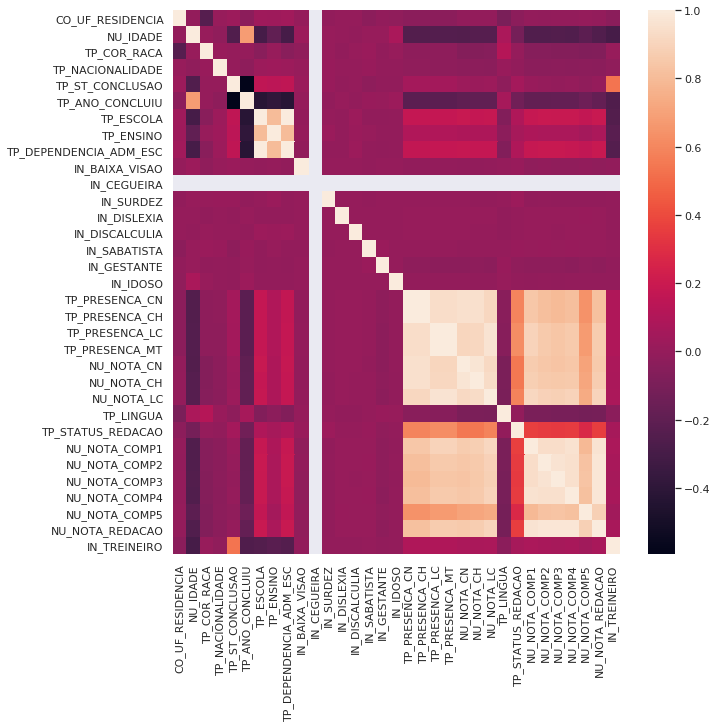

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

Nossa matriz de correlação apesar de muito útil em diversos casos, neste caso com muitas variáveis não é tão visual, então verificaremos as variáveis mais correlacionadas com nossa variável.

In [17]:
corr['IN_TREINEIRO'].sort_values(ascending=False)

IN_TREINEIRO              1.000000
TP_ST_CONCLUSAO           0.533983
TP_PRESENCA_CN            0.094692
TP_PRESENCA_CH            0.094692
TP_PRESENCA_LC            0.092454
TP_PRESENCA_MT            0.092454
NU_NOTA_LC                0.083731
NU_NOTA_CN                0.080915
NU_NOTA_COMP1             0.080326
NU_NOTA_CH                0.078276
NU_NOTA_COMP2             0.069545
NU_NOTA_REDACAO           0.069119
NU_NOTA_COMP4             0.068862
NU_NOTA_COMP3             0.064340
TP_STATUS_REDACAO         0.063190
NU_NOTA_COMP5             0.045809
TP_COR_RACA               0.009676
IN_SABATISTA              0.003824
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_IDOSO                 -0.004663
IN_SURDEZ                -0.007374
IN_GESTANTE              -0.011893
IN_BAIXA_VISAO           -0.013602
TP_NACIONALIDADE         -0.015179
CO_UF_RESIDENCIA         -0.034944
TP_LINGUA                -0.036395
TP_ENSINO                -0.225151
TP_DEPENDENCIA_ADM_E

In [18]:
treineiro = df_train['IN_TREINEIRO']
df_train.drop('IN_TREINEIRO',1,inplace=True)

dummies = pd.get_dummies(df_train.append(df_test))

df_lenght = len(df_train)

df_train = dummies.iloc[:df_lenght]
df_test = dummies.iloc[df_lenght:]

df_train['IN_TREINEIRO'] = treineiro

/home/valeria.silva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


**Dividindo os dados em treino e teste**



In [19]:
X = df_train.drop('IN_TREINEIRO',1)
y = df_train['IN_TREINEIRO']

In [20]:
Xtrain, Xval, ytrain, yval  = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
smt = SMOTETomek(random_state=42)
Xres, yres = smt.fit_resample(Xtrain, ytrain)

In [22]:
Xres.shape

(15942, 123)

In [23]:
yres.shape

(15942,)

**Predição**

In [52]:
random_forest = RandomForestClassifier(n_jobs=1)

random_forest.fit(Xres, yres)

predict = random_forest.predict(Xval)

probability = random_forest.predict_proba(Xval)

**Classificação**

Aqui podemos verificar a acurácia de nosso modelo preditivo

In [54]:
print(classification_report(yval, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3928
           1       0.99      0.98      0.98       603

    accuracy                           1.00      4531
   macro avg       0.99      0.99      0.99      4531
weighted avg       1.00      1.00      1.00      4531



**Dados para submissão**

In [57]:
smt = SMOTETomek(random_state=42)
Xres, yres = smt.fit_resample(X, y)

random_forest.fit(Xres,yres)
sub = random_forest.predict(df_test)

In [58]:
sub

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
treineiro_predict = pd.Series(sub)
treineiro_predict

0       0
1       0
2       1
3       0
4       0
       ..
4565    0
4566    0
4567    0
4568    0
4569    0
Length: 4570, dtype: int64

In [60]:
answer = pd.concat([test_insc,treineiro_predict], axis =1)
answer

,NU_INSCRICAO,0
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [61]:
answer.rename(columns={0:'IN_TREINEIRO'}, inplace=True)
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [63]:
answer.to_csv('answer.csv',index = False)